---
## Sorbonne Université
# <center> Mathématiques discrètes </center>
## <center> LU2IN005 </center>
## <div style="text-align:right;"> Année 2022-2023 </div>
---

---
# <center> TME programmation d'automates finis </center>
L'objectif de ce TME est de programmer en python quelques uns des
algorithmes pour les automates finis vus en cours et en TD, en
utilisant des structures de données fournies dans le code mis à votre
disposition.
---
# Consignes
Copiez dans votre répertoire de travail les fichiers présents dans le Dossier 
*Fichiers Python fournis* de la page Moodle de l'UE.

Ils contiennent les définitions de structures de données décrites
ci-dessous, ainsi que des aide-mémoire sur l'utilisation de python.

**Le seul fichier que vous êtes autorisés à modifier** est celui-ci, c'est-à-dire
`automate_etudiant.ipynb`, partiellement prérempli. 
Les instructions `return` sont à supprimer lorsque
vous remplirez le contenu des différentes fonctions.  Les autres
fichiers n'ont pas besoin d'être lus (mais ils peuvent l'être).
Si votre programme nécessite de lire des fichiers, **ceux-ci doivent être enregistrés dans le répertoire ExemplesAutomates** que vous avez téléchargé.
---

_Binôme_
----------

**NOM**:Essabri              

**Prénom**:Youness           

**Numéro d'étudiant**:28705780     

**NOM**:GAO

**Prénom**:RICK   

**Numéro d'étudiant**:21110625 



### Table des matières

> [1. Présentation](#sec1)
>> [1.1 La classe `State`](#sec1_1) <br>
>> [1.2 La classe `Transition`](#sec1_2) <br>
>> [1.3 La classe `Automate`](#sec1_3)

> [2. Prise en mains](#sec2)
>> [2.1 Création d'automates](#sec2_1) <br>
>> [2.2 Premières manipulations](#sec2_2) <br>

> [3. Exercices de base : tests et complétion](#sec3)

> [4. Déterminisation](#sec4)

> [5. Constructions sur les automates réalisant des opérations sur les langages acceptés](#sec5)
>> [5.1 Opérations ensemblistes sur les langages](#sec5_1) <br>
>> [5.2 Opérations rationnelles sur les langages](#sec5_2)

In [1]:
## Import des bibliothèques nécessaires au projet.
## Ne pas modifier les fichiers "bibliothèque".

## Interpréter cette cellule avant de continuer.

from transition import *
from state import *
import os
import copy
from automateBase import AutomateBase

class Automate(AutomateBase):
    pass

### 1. Présentation  <a class="anchor" id="sec1"></a>

Le projet utilise le langage python avec une syntaxe légèrement
différente de celle vue en **LU1IN001 / 011**, parce qu'il exploite en particulier
la notion de classes d'objets. Une introduction à cette notion est présentée dans le livre associé
au cours : cf [Chapitre 13](https://www-licence.ufr-info-p6.jussieu.fr/lmd/licence/2021/ue/LU1IN001-2021oct/cours2020.pdf).

De plus, le typage des variables est noté de façon légèrement différente, en commentaires, pour les déclarations
comme pour les arguments des fonctions. Pour ces derniers, les types sont indiqués dans la première ligne de la documentation de la fonction.

Les particularités sont brièvement expliquées en annexe
de ce document. Par ailleurs, vous trouverez dans la section
`projet` de la page Moodle un mémo sur la syntaxe python, ainsi que la carte de
référence du langage utilisée en **LU1IN001 / 011**.  On rappelle qu'une ligne
commençant par `#` est un commentaire, ignoré par
l'interpréteur.

Toutes les structures de données nécessaires à la construction des
automates sont fournies sous la forme de classes python, pour les
transitions d'un automate, ses états, et les automates
eux-mêmes. Cette section indique comment les utiliser.

#### 1.1 La classe `State` <a class="anchor" id="sec1_1"></a>

Un état est représenté par
- un entier `id` (type `int`) qui définit son identifiant,
- un booléen `init` (type `bool`) indiquant si c'est un état initial,
- un booléen `fin` (type `bool`) indiquant si c'est un état final,
- une chaîne de caractères `label` (type `str`) qui définit son étiquette, permettant de le *décorer*. Par défaut, cette variable est la version chaîne de caractères de l'identifiant de l'état. 

On définit l'alias de type `State` pour représenter les variables de ce type. 

Ainsi, l'instruction ci-dessous crée une variable `s` représentant un état d'identifiant `1`, qui est un état initial mais pas final, dont l'identifiant et l'étiquette  `1` :

In [2]:
# s : State
s = State(1, True, False)

Si l'on souhaite avoir une étiquette différente de l'identifiant, on
utilise un quatrième argument :

In [3]:
s = State(1, True, False, 'etat 1') 

On accède ensuite aux différents champs de `s` par la notation pointée : exécutez les cellules suivantes pour observer l'affichage obtenu.

In [4]:
print('La valeur de s.id est : ')
print(s.id)

La valeur de s.id est : 
1


In [5]:
print('La valeur de s.init est : ')
print(s.init)

La valeur de s.init est : 
True


In [6]:
print('La valeur de s.fin est : ')
print(s.fin)

La valeur de s.fin est : 
False


In [7]:
print('La valeur de s.label est : ')
print(s.label)

La valeur de s.label est : 
etat 1


In [8]:
print("L'affichage de s est : ")
print(s)

L'affichage de s est : 
etat 1(init)


Ainsi, une variable de type `State` est affichée par son étiquette et, entre parenthèses, si c'est un état initial et/ou final.

#### 1.2 La classe `Transition` <a class="anchor" id="sec1_2"></a>

Une transition est représentée par 
- un état `stateSrc` (type `State`) correspondant à son état de départ
- un caractère `etiquette` (type `str`) donnant son   étiquette
- un état `stateDest` (type `State`) correspondant à son état de destination

On définit l'alias de type `Transition` pour représenter les variables de ce type.

La séquence d'instructions suivante crée la transition d'étiquette `"a"` de l'état `s` (défini ci-dessus) vers lui-même et affiche les différents champs de la transition :

In [9]:
# t : Transition
t = Transition(s, "a", s)

In [10]:
print('La valeur de t.etiquette est : ')
print(t.etiquette)

La valeur de t.etiquette est : 
a


In [11]:
print("L'affichage de t.stateSrc est : ")
print(t.stateSrc)

L'affichage de t.stateSrc est : 
etat 1(init)


On remarque que la variable `stateSrc` est de type `State`, on obtient donc un état, et non uniquement un
identifiant d'état. 

In [12]:
print("L'affichage de t.stateDest est : ")
print(t.stateDest)

L'affichage de t.stateDest est : 
etat 1(init)


In [13]:
print("L'affichage de t est : ")
print(t)

L'affichage de t est : 
[etat 1(init)-a->etat 1(init)]


#### 1.3 La classe `Automate` <a class="anchor" id="sec1_3"></a>

Un automate est représenté par
- l'ensemble de ses transitions `allTransitions` (de type `set[Transition]`) 
- l'ensemble de ses états `allStates` (de type `set[State]`)
- une étiquette `label` (de type `str`) qui est éventuellement vide.

On définit l'alias de type `Automate` pour représenter les variables de ce type.

Ainsi, de même que pour les classes précédentes, l'accès aux
différents champs se fait par la notation pointée. Par exemple, on
obtient l'ensemble des états d'un automate `monAutomate` par
l'instruction `monAutomate.allStates`.

Pour créer un automate, il existe trois possibilités.

**Création à partir d'un ensemble de transitions.**<br>
On peut d'abord utiliser le constructeur de signature `Automate : set[Transition] -> Automate`.<br>
Il déduit alors l'ensemble des états à partir de l'ensemble des transitions et définit par défaut l'étiquette
de l'automate comme la chaîne de caractères vide.

Par exemple, en commençant par créer les états et les transitions nécessaires :

In [14]:
## création d'états
# s1 : State
s1 = State(1, True, False)
# s2 : State
s2 = State(2, False, True)

## création de transitions
# t1 : Transition
t1 = Transition(s1,"a",s1)
# t2 : Transition
t2 = Transition(s1,"a",s2)
# t3 : Transition
t3 = Transition(s1,"b",s2)
# t4 : Transition
t4 = Transition(s2,"a",s2)
# t5 : Transition
t5 = Transition(s2,"b",s2)
# set_transitions : set[Transition]
set_transitions = {t1, t2, t3, t4, t5}

## création de l'automate
# aut : Automate
aut = Automate(set_transitions)

L'affichage de cet automate, par la commande `print(aut)` produit alors le résultat suivant : 

In [15]:
print(aut)

Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-a->2(fin)]



Les états de l'automate sont déduits de l'ensemble de transitions.

Optionnellement, on peut donner un nom à l'automate, en utilisant la variable `label`, par exemple :

In [16]:
# aut2 : Automate
aut2 = Automate(set_transitions, label="A") 

print(aut2)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-a->2(fin)]



**Création à partir d'un ensemble de transitions et d'un ensemble d'états.**<br>
Dans le second cas, on crée un automate à partir d'un ensemble de
transitions mais aussi d'un ensemble d'états, par exemple pour représenter des
automates contenant des états isolés. Pour cela, on utilise le
constructeur `Automate : set[Transition] x set[State] -> Automate`.

On peut également, optionnellement, donner un nom à l'automate :

In [17]:
# set_etats : set[State]
set_etats = {s1, s2}

# aut3 : Automate
aut3 = Automate(set_transitions, set_etats, "B")

print(aut3)

Automate B
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-a->2(fin)]



L'ordre des paramètres peut ne pas être respecté **à la condition** que l'on donne leur nom explicitement. Ainsi, la ligne suivante est correcte :

In [18]:
aut = Automate(setStates = set_etats, label = "A", setTransitions = set_transitions)

print(aut)

Automate A
Etats :
  1(init)
  2(fin)
Transitions :
  [2(fin)-b->2(fin)]
  [2(fin)-a->2(fin)]
  [1(init)-b->2(fin)]
  [1(init)-a->1(init)]
  [1(init)-a->2(fin)]



**Création à partir d'un fichier contenant sa description.**<br>
La fonction `Automate.creationAutomate : str -> Automate` prend en argument un nom de fichier qui décrit un automate et construit l'automate correspondant (voir exemple ci-dessous).

La description textuelle de l'automate doit suivre le format suivant (voir exemple ci-dessous) :
- #E: suivi de la liste des noms des états, séparés par
  des espaces ou des passages à la ligne. Les noms d'états peuvent
  être n'importe quelle chaîne alphanumérique pouvant également
  contenir le symbole `_`. Par contre, si le nom d'état
  contient des symboles *non numériques* il ne doit pas commencer
  par un chiffre, sous peine de provoquer une erreur à l'affichage.
  Ainsi, `10` et `A1` sont des noms d'états possibles,
  mais `1A` ne l'est pas.
- #I: suivi de la liste des états initiaux
  séparés par des espaces ou des passages à la ligne, 
- #F: suivi de la liste des
  états finaux séparés par des espaces ou des passages à la ligne, 
- #T: suivi de la liste des transitions séparées par des
  espaces ou des passages à la ligne. Chaque transition est donnée
  sous le format `(etat1, lettre, etat2)`.

Par exemple le fichier `exempleAutomate.txt` contenant <br>
`#E: 0 1 2 3`<br>
`#I: 0`<br>
`#F: 3`<br>
`#T: (0 a 0)`<br>
`	(0 b 0)`<br>
`	(0 a 1)`<br>
`	(1 a 2)`<br>
`	(2 a 3)`<br>
`	(3 a 3)`<br>
`	(3 b 3)`<br>
est formaté correctement. L'appel suivant produira l'affichage...

In [19]:
# automate : Automate
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
print(automate)

Etats :
  0(init)
  1
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [1-a->2]
  [0(init)-a->0(init)]
  [0(init)-b->0(init)]
  [3(fin)-a->3(fin)]
  [0(init)-a->1]
  [2-a->3(fin)]



**Fonctions de manipulation des automates.**<br>
La classe automate contient également de nombreuses fonctions utiles. Elles
s'appliquent à un objet de type `Automate` et s'utilisent donc sous la forme
`aut.<`*fonction*`>(<`*parametres*`>)` où `aut` est une variable de type `Automate`.


- `show : float -> NoneType` <br> 
    prend en argument facultatif un flottant (facteur de grossissement, par défaut il vaut 1.0) et produit une représentation graphique de l'automate.<br>
    Ainsi, en utilisant l'automate défini dans le fichier d'exemple précédent, l'instruction `automate.show(1.2)` produit l'image suivante :

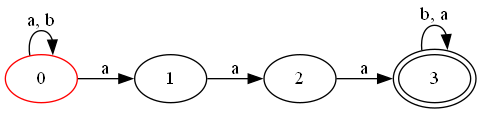

In [20]:
automate.show(1.2)

- `addTransition : Transition -> bool`<br>
  prend en argument une transition `t`, fait la mise à jour de
  l'automate en lui ajoutant `t` et ajoute les états impliqués
  dans l'automate s'ils en sont absents. Elle rend `True` si l'ajout a
  eu lieu, `False` sinon (si `t` était déjà présente dans l'automate).
  
- `removeTransition : Transition -> bool`<br>
  prend en argument une transition `t` et fait la mise à jour de
  l'automate en lui enlevant la transition, sans modifier les
  états. Elle rend `True` si la suppression a eu lieu, `False` sinon (si
  `t` était absente de l'automate).

- `addState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en lui ajoutant `s`.  Elle rend `True` si l'ajout a eu
  lieu, `False` sinon (si `s` était déjà présent dans l'automate).

- `nextId : -> int`<br>
  renvoie un entier id frais, en choisissant l'entier le plus petit,
  strictement supérieur à tous les id des états de l'automate.

- `removeState : State -> bool`<br>
  prend en argument un état `s` et fait la mise à jour de
  l'automate en supprimant `s` ainsi que toutes ses transitions
  entrantes et sortantes.  Elle rend `True` si l'ajout a eu lieu, `False`
  sinon (si `s` était absent de l'automate).
  
- `getSetInitialStates :  -> set[State]`<br> 
  rend l'ensemble des états initiaux.

- `getSetFinalStates :  -> set[State]`<br>
  rend l'ensemble des états finaux.

- `getSetTransitionsFrom : State -> set[Transition]`<br>
  rend l'ensemble des transitions sortant de l'état passé en argument.

- `prefixStates : int -> NoneType`<br>
  modifie les identifiants et les étiquettes de tous les états de
  l'automate en les préfixant par l'entier passé en argument.

- `succElem : State x str -> set[State]`<br>
  étant donné un état `s` et un caractère `a`, elle rend l'ensemble des
  états successeurs de `s` par le caractère `a`.  Formellement,
  
  $$succElem(s, a) = \{s' \in S \mid  s \xrightarrow{a} s'\}.$$
  
  Cet ensemble peut contenir plusieurs états si l'automate n'est pas déterministe.

In [21]:
# Voilà le code de succElem

def succElem(self, state, lettre):
    """ State x str -> set[State]
        rend l'ensemble des états accessibles à partir d'un état state par l'étiquette lettre
    """
    successeurs = set()
    # t: Transitions
    for t in self.getSetTransitionsFrom(state):
        if t.etiquette == lettre:
            successeurs.add(t.stateDest)
    return successeurs

Automate.succElem = succElem

Avec l'exemple précédent, on obtient :

In [22]:
s0 = list(automate.getSetInitialStates())[0] ## on récupère l'état initial de automate
automate.succElem(s0, 'a')

{0(init), 1}

### 2. Prise en mains  <a class="anchor" id="sec2"></a>

#### 2.1 Création d'automates <a class="anchor" id="sec2_1"></a>

Soit l'automate $\mathcal{A}$ défini sur l'alphabet $\{ a,b \}$, d'états $0,1,2$, 
d'état initial 0, d'état final 2 et de transitions : <br>$(0,a,0)$, $(0,b,1)$, 
$(1,a,2)$, $(1,b,2)$, $(2,a,0)$ et $(2,b,1)$.

1. Créer l'automate $\mathcal{A}$ à l'aide de son ensemble de transitions. Pour cela, créer un état `s0`  
d'identifiant $0$
  qui soit initial, un état `s1` d'identifiant $1$ et un état
  `s2` d'identifiant $2$ qui soit final. Puis créer `t1`, `t2`, `t3`, `t4`, `t5` et
  `t6` les 6 transitions de l'automate. Créer enfin l'automate
  `auto` à partir de ses transitions, par exemple avec l'appel<br>
  `auto = Automate({t1,t2,t3,t4,t5,t6})`.<br>
  Vérifier que l'automate correspond bien à $\mathcal{A}$ en l'affichant.

In [23]:
s0=State(0,True,False,'0')
s1=State(1,False,False,'1')
s2=State(2,False,True,'2')

t1=Transition(s0,"a",s0)
t2=Transition(s0,"b",s1)
t3=Transition(s1,"a",s2)
t4=Transition(s1,"b",s2)
t5=Transition(s2,"a",s0)
t6=Transition(s2,"b",s1)

set_transition={t1,t2,t3,t4,t5,t6}
auto = Automate(set_transition,label="A")

print(auto)



Automate A
Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]
  [2(fin)-b->1]
  [0(init)-b->1]



2. Créer l'automate $\mathcal{A}$ à l'aide de sa liste de
  transitions et d'états, par exemple à l'aide de l'appel<br>
  `auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2})`<br>
  puis afficher l'automate obtenu à l'aide de `print` puis à l'aide de `show`.
  Vérifier que l'automate `auto1` est bien
  identique à l'automate `auto`.

In [24]:
auto1 = Automate({t1,t2,t3,t4,t5,t6}, {s0,s1,s2},"A")
print(auto1)

Automate A
Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]
  [2(fin)-b->1]
  [0(init)-b->1]



3. Créer l'automate $\mathcal{A}$ à partir d'un fichier. Pour cela,
  créer un fichier `auto2.txt`, dans lequel sont indiqués les
  listes des états et des transitions, ainsi que l'état initial et
  l'état final, en respectant la syntaxe donnée dans la section
  précédente. Par exemple la liste d'états est décrite par la ligne
  `#E: 0 1 2`.  Utiliser ensuite par exemple l'appel
  `auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")`, puis afficher
  l'automate `auto2` à l'aide de `print` ainsi qu'à l'aide de `show`.

Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]
  [2(fin)-b->1]
  [0(init)-b->1]



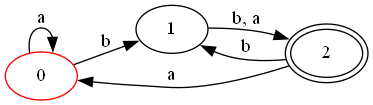

In [25]:
aut = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
print(aut)
aut.show()

#### 2.2 Premières manipulations <a class="anchor" id="sec2_2"></a>

1. Appeler la fonction `removeTransition` sur l'automate
  `auto` en lui donnant en argument la transition $(0,a,1)$. Il
  s'agit donc de créer une variable `t` de type
  `Transition` représentant $(0,a,1)$ et d'effectuer l'appel
  `auto.removeTransition(t)`. Observer le résultat sur un
  affichage.  Appeler ensuite cette fonction sur `auto` en lui
  donnant en argument la transition `t1`. Observer le résultat
  sur un affichage. Appeler la fonction `addTransition` sur
  l'automate `auto` en lui donnant en argument la transition
  `t1`. Vérifier que l'automate obtenu est bien le même
  qu'initialement.

In [26]:
t=Transition(s0,"a",s1)
auto.removeTransition(t)
#Retourne False
auto.removeTransition(t1)
#Retourne True. t1 a bien ete enlever

True

In [27]:
auto.addTransition(t1)
print(auto)

Automate A
Etats :
  0(init)
  1
  2(fin)
Transitions :
  [0(init)-a->0(init)]
  [1-a->2(fin)]
  [2(fin)-a->0(init)]
  [1-b->2(fin)]
  [2(fin)-b->1]
  [0(init)-b->1]



2. Appeler la fonction `removeState` sur l'automate
  `auto` en lui donnant en argument l'état
  `s1`. Observer le résultat. Appeler la fonction
  `addState` sur l'automate `auto` en lui donnant en
  argument l'état `s1`. Créer un état `s0bis` d'identifiant
  $0$ et initial. Appeler la fonction `addState` sur
  `auto` avec `s0bis` comme argument. Observer le résultat.

In [28]:
auto.removeState(s1)
#Retourne True
auto.addState(s1)
#Retourne True
s0bis=State(0,True,False,'etat 0')
auto.addState(s0bis)
#Retourne False car s0bis est deja present dans l'automate sous le nom de s0

False

3. Appeler la fonction `getSetTransitionsFrom` sur
  l'automate `auto1` avec `s1` comme argument. Afficher
  le résultat.

In [29]:
auto1.getSetTransitionsFrom(s1)

{[1-a->2(fin)], [1-b->2(fin)]}

### 3. Exercices de base : tests et complétion  <a class="anchor" id="sec3"></a>

1. Donner une définition de la fonction `succ`
  qui, étant donné un ensemble d'états $S$ et une chaîne de caractères
      $a$ (de longueur 1), renvoie l'ensemble des états successeurs de tous les états de $L$ par le caractère $a$. Cette fonction doit généraliser la fonction `succElem` pour qu'elle prenne en paramètre un ensemble d'états au lieu d'un seul état.  Formellement, si $S$ est un ensemble d'états et $a$ une lettre,
  $$succ(S,a) = \bigcup_{s \in S}succ(s,a) = \{s' \in S \mid \mbox{il
    existe } s \in L \mbox{ tel que } s \xrightarrow{a} s'\}.$$

In [30]:
def succ(self, setStates, lettre):
    """ Automate x set[State] x str -> set[State]
        rend l'ensemble des états accessibles à partir de l'ensemble d'états setStates par l'étiquette lettre
    """
    set_res=set()
    for i in setStates:
        set_res=set_res.union(self.succElem(i,lettre))
    return set_res

Automate.succ=succ

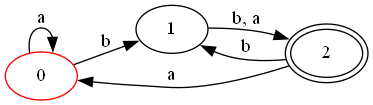

---


{2(fin)}

In [31]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.succ({s0, s2}, 'b') == {s1}
assert auto1.succ({s0}, 'a') == {s0}
assert auto1.succ({s0, s1}, 'a') == {s0, s2}
auto1.succ({s0, s1}, 'a').intersection(auto1.getSetFinalStates())

In [32]:
# Fournir un autre jeu de tests
assert auto1.succ({s1, s2}, 'b') == {s2,s1}
assert auto1.succ({s1}, 'b') == {s2}
assert auto1.succ({s0, s1, s2}, 'b') == {s1, s2}

2. Donner une définition de la fonction `accepte`
  qui, étant donné une chaîne de caractères `mot`,
  renvoie un booléen qui vaut vrai si et seulement si `mot` est accepté par l'automate. Attention, noter que l'automate peut ne pas être déterministe.

In [33]:
# A faire 

def accepte(self, mot) :
    """ Automate x str -> bool
        rend True si auto accepte mot, False sinon
    """
    res=self.getSetInitialStates()
    for i in mot:
        res=succ(self,res,i)
    for i in self.getSetFinalStates():
        if i in res:
            return True
    return False

Automate.accepte = accepte

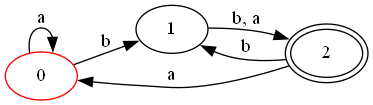

---


In [34]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.accepte('aa') == False
assert auto1.accepte('ab') == False
assert auto1.accepte('aba') == True

In [35]:
# Fournir un autre jeu de tests
assert auto1.accepte('aabb') == True
assert auto1.accepte('babb') == True
assert auto1.accepte('abaa') == False

3. Donner une définition de la fonction `estComplet`
    qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`
    renvoie un booléen qui vaut vrai si et
    seulement si `auto` est complet par rapport à l'alphabet.
    
    On n'effectuera pas la vérification sur les états non accessibles depuis les états initiaux.

In [36]:
# A faire 

def estComplet(self, Alphabet) :
    """ Automate x set[str] -> bool
        rend True si auto est complet pour les lettres de Alphabet, False sinon
        hyp : les éléments de Alphabet sont de longueur 1
    """
    for i in self.allStates: #Parcours de tous les etats de self
        for j in Alphabet:#Parcours de Alphabet
            res=self.succElem(i,j)
            if len(res)==0: #Si il n'y a aucune transition d'etiquette j partant de l'etat i on retourne false
                return False
    return True


Automate.estComplet = estComplet

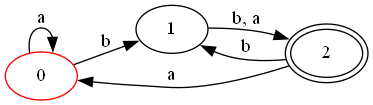

---


In [37]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
assert auto1.estComplet({'a', 'c', 'b'}) == False

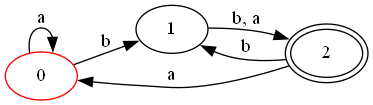

---


In [38]:
# Fournir un autre jeu de tests
auto1.show()
print('---')
assert auto1.estComplet({'a'}) == True
assert auto1.estComplet({'a', 'd', 'b'}) == False
assert auto1.estComplet({'e'}) == False

4. Donner une définition de la fonction `estDeterministe`
qui, étant donné un automate `auto`,
 renvoie un booléen qui vaut vrai si et seulement si `auto` est déterministe.

In [39]:
# A faire 

def estDeterministe(self) :
    """ Automate -> bool
        rend True si auto est déterministe, False sinon
    """
    if(len(self.allStates)<1):
        return False
    if(len(self.getSetInitialStates())!=1):
        return False
    

    
    etat=self.allStates #Stockage des etats de self dans la variable etat
    for i in etat:
        tr=self.getSetTransitionsFrom(i) #Stockage des transitions existantes depuis l'etat i
        etiqu=[]
        for j in tr:
            etiqu.append(j.etiquette) #Ajout de l'etiquette de chaque tansition depuis l'etat i dans une variable etiqu de type list
        for e in etiqu:
            if etiqu.count(e)>1: #Si le nombre d'occurence de l'etiquette e est superieur à 1 ont retourne false
                return False
    return True
    
Automate.estDeterministe = estDeterministe

L'appel de fonction `copy.deepcopy(auto)` renvoie un nouvel automate identique à `auto`.

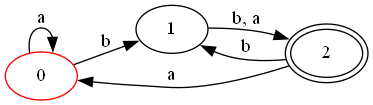

---


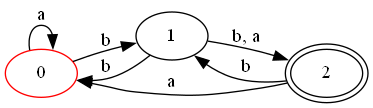

---


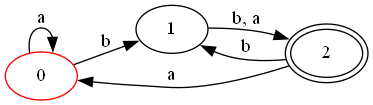

---


In [40]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant, puis un jeu de tests :

auto1.show()
print('---')
assert auto1.estDeterministe() == True

auto1bis = copy.deepcopy(auto1)
#t : Transition
t = Transition(s1, 'b', s0)
auto1bis.addTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == False

auto1bis.removeTransition(t)
auto1bis.show()
print('---')
assert auto1bis.estDeterministe() == True


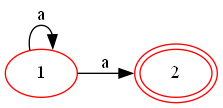

In [99]:
# Fournir un autre jeu de tests

auto_test=Automate(set())
assert auto_test.estDeterministe() == False

#creation des etats
s10 = State(1, True, False)
s11 = State(2, True, True)

## création de transitions
t10 = Transition(s10,"a",s10)
t11 = Transition(s10,"a",s11)
# set_transitions : set[Transition]
set_transitions = {t10, t11}

## création de l'automate
# aut : Automate
auto_test1 = Automate(set_transitions)
auto_test1.show()
assert auto_test1.estDeterministe() == False

5. Donner une définition de la fonction `completeAutomate`
qui, étant donné un automate `auto` et l'ensemble alphabet d'entrée `Alphabet`,
renvoie l'automate complété d'`auto`.
  
Attention, il ne faut pas modifier `auto`, mais construire un nouvel automate.
<br>Il pourra être intéressant d'utiliser l'appel de fonction
`copy.deepcopy(auto)` qui renvoie un nouvel automate identique à `auto`.
<br>On pourra faire appel à la fonction `nextId` afin de construire l'état $\bot$.

In [43]:
# A faire

def completeAutomate(self, Alphabet) :
    """ Automate x str -> Automate
        rend l'automate complété de self, par rapport à Alphabet
    """
    auto_res=copy.deepcopy(self)
    if estComplet(auto_res,Alphabet): #Verfication dans le cas ou l'automate serait complet
        return auto_res
    #Creation d'un etat "poubelle" permettant de rendre complet l'automate
    set_transition=set()
    etat_poubelle = State(auto_res.nextId(), False, False, 'etat_poubelle')
    auto_res.addState(etat_poubelle)
    for i in auto_res.allStates: #Parcours de tous les etats de auto_res
        for j in Alphabet: #Parcours de Alphabet
            res=auto_res.succElem(i,j)
            if len(res)==0: #Si il n'y a aucune transition d'etiquette j partant de l'etat i, on crée une transition d'etiquette j depuis l'etat i vers l'etat poubelle (s4)
                auto_res.addTransition(Transition(i,j,etat_poubelle))
    
    return auto_res

Automate.completeAutomate = completeAutomate

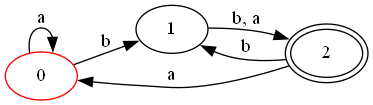

---


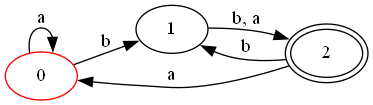

---


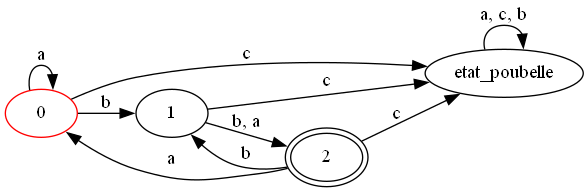

In [44]:
# On a défini auparavant un automate auto1, voilà les résultats le concernant :

auto1.show()
print('---')
assert auto1.estComplet({'a', 'b'}) == True
auto1complet = auto1.completeAutomate({'a', 'b'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b'}) == True

print('---')
assert auto1.estComplet({'a', 'b', 'c'}) == False
auto1complet = auto1.completeAutomate({'a', 'b', 'c'})
auto1complet.show()
assert auto1complet.estComplet({'a', 'b','c'}) == True

In [45]:
# Fournir un autre jeu de tests
assert auto1.estComplet({'a', 'b', 'c','d'}) == False
auto2complet = auto1.completeAutomate({'a', 'b','c','d'})
assert auto2complet.estComplet({'a', 'b', 'c','d'}) == True

### 4. Déterminisation  <a class="anchor" id="sec4"></a>

1. Donner une définition de la fonction `newLabel`
qui, étant donné un ensemble d'états renvoie une *chaîne de caractères* représentant l'ensemble de tous les labels des états.
Par exemple, l'appel de `newLabel` sur un ensemble de 3 états dont les labels sont `'1', '2', '3'` renvoie `'{1,2,3}'`

Afin d'être assuré que l'ordre de parcours de l'ensemble des états n'a pas d'importance, il sera nécessaire de trier par ordre alphabétique la liste des `label` des états. On pourra faire appel à `L.sort()` qui étant donné la liste `L` de chaînes de caractères, la trie en ordre alphabétique.

In [46]:
# A faire

def newLabel(S):
    """ set[State] -> str
    """
    L=[]
    res="{"
    for i in S:
        L.append(i.label)
    L.sort()
    for i in range (0,len(L)):
        if i==len(L)-1:
            res=res+L[i]
        else:
            res=res+L[i]+","
    return res+"}"


In [47]:
# On a défini auparavant un automate auto1, voilà un test le concernant :
newLabel(auto1.allStates)

'{0,1,2}'

In [48]:
# Fournir un autre jeu de tests
newLabel(aut3.allStates)

'{1,2}'

La fonction suivante permet de déterminiser un automate. On remarque qu'un état peut servir de clé dans un dictionnaire.

In [49]:
def determinisation(self) :
    """ Automate -> Automate
    rend l'automate déterminisé de self """
    # Ini : set[State]
    Ini = self.getSetInitialStates()
    # fin : bool
    fin = False
    # e : State
    for e in Ini:
        if e.fin:
            fin = True
    lab = newLabel(Ini)
    s = State(0, True, fin, lab)
    A = Automate(set())
    A.addState(s)
    Alphabet = {t.etiquette for t in self.allTransitions}
    Etats = dict()
    Etats[s] = Ini
    #

    #
    A.determinisation_etats(self, Alphabet, [s], 0, Etats, {lab})
    #{lab} fait reference a DejaVus
    return A

L'automate déterminisé est construit dans `A`. Pour cela la fonction récursive `determinisation_etats` modifie en place l'automate `A`, et prend en outre les paramètres suivants :
- `auto`, qui est l'automate de départ à déterminiser
- `Alphabet` qui contient l'ensemble des lettres étiquetant les transistions de l'automate de départ
- `ListeEtatsATraiter` qui est la liste des états à ajouter et à traiter dans `A` au fur et à mesure que l'on progresse dans `auto`.
- `i` qui est l'indice de l'état en cours de traitement (dans la liste `ListeEtatsATraiter`).
- `Etats` qui est un dictionnaire dont les clés sont les états de `A` et les valeurs associées sont l'ensemble d'états issus de `auto` que cette clé représente.
- `DejaVus` est l'ensemble des labels d'états de `A` déjà vus.

In [50]:
# A faire 
#VERSION FINALE DE LA FONCTION
def determinisation_etats(self, auto, Alphabet, ListeEtatsATraiter, i, Etats, DejaVus):
    """ Automate x Automate x set[str] x list[State] x int x dict[State : set[State]], set[str] -> NoneType
    """
    
    if i>=len(ListeEtatsATraiter):
        return
    
    for j in Alphabet:
        tmp1=auto.succ(Etats[ListeEtatsATraiter[i]],j)
        tmp2=newLabel(tmp1)
        if tmp2 not in DejaVus:
            inter_final=tmp1.intersection(auto.getSetFinalStates())
            if len(inter_final)==0:
                etat=State(self.nextId(),False,False,tmp2)
            else:
                etat=State(self.nextId(),False,True,tmp2)
            Etats[etat]=tmp1
            self.addTransition(Transition(ListeEtatsATraiter[i],j,etat))
            ListeEtatsATraiter.append(etat)
            DejaVus.add(tmp2)
        else:
            for k, val in Etats.items(): 
                if tmp1 == val: 
                    self.addTransition(Transition(ListeEtatsATraiter[i],j,k))
    i=i+1
    determinisation_etats(self,auto,Alphabet,ListeEtatsATraiter,i,Etats,DejaVus)

Automate.determinisation_etats = determinisation_etats
Automate.determinisation = determinisation

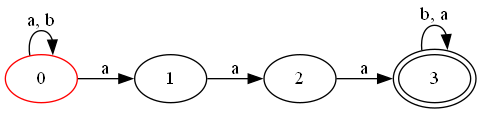

True


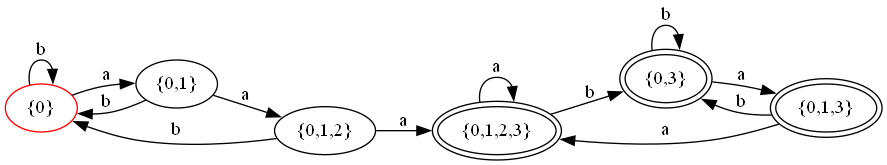

Etats :
  {0}(init)
  {0,1}
  {0,1,2}
  {0,1,2,3}(fin)
  {0,3}(fin)
  {0,1,3}(fin)
Transitions :
  [{0,1,2}-b->{0}(init)]
  [{0,1,3}(fin)-a->{0,1,2,3}(fin)]
  [{0,1,2,3}(fin)-b->{0,3}(fin)]
  [{0,3}(fin)-a->{0,1,3}(fin)]
  [{0}(init)-a->{0,1}]
  [{0,1}-a->{0,1,2}]
  [{0,3}(fin)-b->{0,3}(fin)]
  [{0,1,2}-a->{0,1,2,3}(fin)]
  [{0}(init)-b->{0}(init)]
  [{0,1,2,3}(fin)-a->{0,1,2,3}(fin)]
  [{0,1}-b->{0}(init)]
  [{0,1,3}(fin)-b->{0,3}(fin)]



{{0,1,2,3}(fin), {0,1,2}, {0,1,3}(fin), {0,1}, {0,3}(fin), {0}(init)}

In [51]:
# Voici un test
#automate est l'automate construit plus haut a partir du fichier exempleAutomate.txt
automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
auto_det = automate.determinisation()
print(auto_det.estDeterministe())
auto_det.show(2)
print(auto_det)
automate.allStates
auto_det.allStates

In [52]:
#Fournir d'autres jeux de tests
#Test 1
s1 = State(1, True, False)

s2 = State(2, False, True)

t1 = Transition(s1,"a",s1)
t2 = Transition(s1,"a",s2)
t3 = Transition(s1,"b",s2)
t4 = Transition(s2,"a",s2)
t5 = Transition(s2,"b",s2)
set_transitions = {t1, t2, t3, t4, t5}

aut = Automate(set_transitions)
aut.estDeterministe()
auto_res=aut.determinisation()
print(auto_res.estDeterministe())
print(auto_res)

True
Etats :
  {1}(init)
  {2}(fin)
  {1,2}(fin)
Transitions :
  [{1}(init)-a->{1,2}(fin)]
  [{1,2}(fin)-a->{1,2}(fin)]
  [{2}(fin)-b->{2}(fin)]
  [{1,2}(fin)-b->{2}(fin)]
  [{1}(init)-b->{2}(fin)]
  [{2}(fin)-a->{2}(fin)]



In [53]:
#Test 2
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)

t1 = Transition(s0,"a",s0)
t2 = Transition(s0,"b",s0)
t3 = Transition(s0,"a",s1)
t4 = Transition(s1,"b",s2)
t5 = Transition(s2,"a",s2)
t6 = Transition(s2,"b",s2)
set_transitions = {t1, t2, t3, t4, t5, t6}

aut = Automate(set_transitions)
print(aut.estDeterministe())
auto_res=aut.determinisation()
print(auto_res)
print(auto_res.estDeterministe())

False
Etats :
  {0}(init)
  {0,1}
  {0,2}(fin)
  {0,1,2}(fin)
Transitions :
  [{0,1,2}(fin)-b->{0,2}(fin)]
  [{0,1}-a->{0,1}]
  [{0}(init)-a->{0,1}]
  [{0,2}(fin)-b->{0,2}(fin)]
  [{0,1}-b->{0,2}(fin)]
  [{0}(init)-b->{0}(init)]
  [{0,2}(fin)-a->{0,1,2}(fin)]
  [{0,1,2}(fin)-a->{0,1,2}(fin)]

True


In [54]:
def asserteq(a,b):
	assert(a==b)
	return

## Test successeur
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, True)

asserteq(auto_t1.succ({s0, s2}, 'b'),{s1}) 
asserteq(auto_t1.succ({s0}, 'a'),{s0})
asserteq(auto_t1.succ({s0, s1}, 'a'),{s0, s2})

#test sur 3 états
asserteq(auto_t1.succ({s0,s1,s2}, 'b'),{s1, s2})


#tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
#auto_t2.show(1.2) #debug
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, False)
s3 = State(3, False, True)
asserteq(auto_t2.succ({s0}, 'a'),{s0, s1})
asserteq(auto_t2.succ({s2,s3}, 'a'),{s3})
asserteq(auto_t2.succ({s0}, 'b'),{s0})

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") 
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
#auto_t2.show(1.2) #debug
s0 = State(0, True, False)
s1 = State(1, False, False)
s2 = State(2, False, False)
s3 = State(3, False, True)

#test sur une lettre ne faisant pas parti de l'alphabet
asserteq(auto_t1.succ({s0, s1}, 'c'), set())


#Test sur l'automate sans transition d'unique état 0
seul=State(0,True,True)
solitaire=Automate(set(),{seul})
asserteq(solitaire.succ({seul}, 'c'), set())

#Tests cas vides :
asserteq(auto_t1.succ(set(),'a'),set())
auto_vide=Automate(set())
asserteq(auto_vide.succ({s0},'a'),set())

### Test accepte
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"

asserteq(auto_t1.accepte('aa'),False)
asserteq(auto_t1.accepte('ab'),False)
asserteq(auto_t1.accepte('aba'),True)
asserteq(auto_t1.accepte('aab'), False)
asserteq(auto_t1.accepte('abba'),False)
asserteq(auto_t1.accepte('abaaa'),False)
asserteq(auto_t1.accepte(''),False)
asserteq(auto_t1.accepte('bb'),True)
asserteq(auto_t1.accepte('abbbbbbbb'),True)
asserteq(auto_t1.accepte('abbbbbbb'),False)
asserteq(auto_t1.accepte('ccccc'),False)

#tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
#auto_t2.show(1.2) #debug

asserteq(auto_t2.accepte('baab'), False)
asserteq(auto_t2.accepte('baaab'), True)
asserteq(auto_t2.accepte('baaaaaaaa'), True)
asserteq(auto_t2.accepte('bbbbbbbb'), False)

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"

#test sur un automate à 2 états finaux
s0 = State(0, True, True)
s1 = State(1, False, True)
deux_f=Automate({Transition(s0,'a',s0),Transition(s0,'b',s1)},{s0,s1})
asserteq(deux_f.accepte('a'), True)

#test sur un automate sans états final ni initial
s3=State(0,False,False)
auto_if = Automate({Transition(s3,'a',s3)},{s3})
asserteq(auto_if.accepte('a'),False)
asserteq(auto_if.accepte(''),False)

#test sur un automate sans état final
s4=State(0,True,False)
auto_f = Automate({Transition(s4,'a',s4)},{s4})
asserteq(auto_f.accepte('a'),False)
asserteq(auto_f.accepte(''),False)

#test sur un automate sans état initial
s5 = State(0,False,True)
auto_i=Automate({Transition(s5,'a',s5)},{s5})
asserteq(auto_i.accepte('a'),False)
asserteq(auto_i.accepte(''),False)

#test sur un etat initial et final
s6=State(0,True,True)
auto_all=Automate(set(),{s6})
asserteq(auto_all.accepte(''),True)

#tests cas vides :
auto_vide=Automate(set())
asserteq(auto_vide.accepte('a'),False)
asserteq(auto_vide.accepte(''),False)


### Test est_complet

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"

asserteq(auto_t1.estComplet({'a', 'b'}),True)

asserteq(auto_t1.accepte('ab'),False)

#test sur un alphabet plus petit
asserteq(auto_t1.estComplet({'a'}),True)
#test sur un alphabet plus grand
asserteq(auto_t1.estComplet({'a','b','c'}),False)


#tests sur un automate non déterministe
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
#auto_t2.show(1.2) #debug
asserteq(auto_t2.estComplet({'a'}),True)
asserteq(auto_t2.estComplet({'a','b'}),False)


#test cas vides

auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto" 
asserteq(auto_t1.estComplet(set()),True)

auto_vide=Automate(set())
asserteq(auto_vide.estComplet('a'),True)

s6=State(0,True,True)
auto_all=Automate(set(),{s6})
asserteq(auto_all.estComplet('a'),False)



### Test est_deterministe

s0 = State(0, True, False)
s1 = State(1, False, False)
t = Transition(s1, 'b', s0)
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")#Correspond à l'automate "auto"

asserteq(auto_t1.estDeterministe(), True)

auto_t1.addTransition(t)

asserteq(auto_t1.estDeterministe(), False)

auto_t1.removeTransition(t)


#tests sur 2 automates non déterministes

auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
#auto_t2.show(1.2) #debug
asserteq(auto_t2.estDeterministe(), False)

auto_t3 = Automate.creationAutomate("ExemplesAutomates/auto_cours_p21.txt")
#auto_t3.show(1.2) #debug
asserteq(auto_t3.estDeterministe(), False)

#test sur un automate avec 2 états initiaux
seul1=State(0,True,True)
seul2=State(1,True,True)

solitaire=Automate(set(),{seul1,seul2})
asserteq(solitaire.estDeterministe(), False)



auto_vide=Automate(set())
asserteq(auto_vide.estDeterministe(),False)

s6=State(0,True,True)
auto_all=Automate(set(),{s6})
asserteq(auto_all.estDeterministe(),True)

s7=State(0,False,True)
auto_all=Automate({Transition(s7,'a',s7)},{s7})
asserteq(auto_all.estDeterministe(),False)

### Test completeAutomate
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")#Correspond à l'automate "auto"



asserteq(auto_t1.estComplet({'a', 'b', 'c'}), False)
auto_t1_c =auto_t1.completeAutomate({'a', 'b', 'c'})
asserteq(auto_t1_c.estComplet({'a', 'b','c'}),True)


#tests sur un automate non déterministe
auto_t3 = Automate.creationAutomate("ExemplesAutomates/auto_cours_p21.txt")

#auto_t3.show(1.2) #debug



auto_comp1 = auto_t3.completeAutomate({'a', 'b'})
asserteq(auto_comp1.estComplet({'a', 'b'}), True)


#vérifie que l'état puit soit ni final ni inital
ens=auto_comp1.succElem(State(2,False,False),'b')
for s in ens:
    asserteq(s.init,False)
    asserteq(s.fin,False)
    

auto_comp2 = auto_t3.completeAutomate({'a'})
asserteq(auto_comp2.estComplet({'a'}), True)

auto_comp3 = auto_t3.completeAutomate({'a','b','c'})
asserteq(auto_comp3.estComplet({'a','b','c'}), True)
       
### Test newl_label
auto_t1 = Automate.creationAutomate("ExemplesAutomates/auto2.txt") #Correspond à l'automate "auto"

asserteq(newLabel(auto_t1.allStates),'{0,1,2}')


s0 = State(0, True, False)
s1 = State(1, False, False)
asserteq(newLabel(auto_t1.allStates),newLabel(auto_t1.allStates))

s0 = State(0, True, False,"B")
s1 = State(1, False, False,"C")
asserteq(newLabel({s0,s1}),'{B,C}')
asserteq(newLabel({s0}),'{B}') 


### Tests determinisation
auto_t2 = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
asserteq(auto_t2.estDeterministe(), False)
auto_det = auto_t2.determinisation()
asserteq(auto_det.estDeterministe(), True)

       
asserteq(auto_det.accepte('baab'), False)
asserteq(auto_det.accepte('baaab'), True)
asserteq(auto_det.accepte('baaaaaaaa'), True)
asserteq(auto_det.accepte('bbbbbbbb'), False)
asserteq(auto_det.accepte('aaaba'), True)



auto_t3 = Automate.creationAutomate("ExemplesAutomates/auto_cours_p21.txt")
    
auto_det = auto_t3.determinisation()
asserteq(auto_det.estDeterministe(), True)
#auto_det.show(1.7) #debug
#7
asserteq(auto_det.accepte('ab'), False)
asserteq(auto_det.accepte('baaab'), False)
asserteq(auto_det.accepte('baaaaaaaa'), False)
asserteq(auto_det.accepte('bbbbbbbb'), False)
asserteq(auto_det.accepte('bbbbbbbbaba'), True)
asserteq(auto_det.accepte('aba'), True)
asserteq(auto_det.accepte('bbbbbbbbaba'), True)

### 5. Constructions sur les automates réalisant  des opérations sur les langages acceptés <a class="anchor" id="sec5"></a>


#### 5.1 Opérations ensemblistes sur les langages <a class="anchor" id="sec5_1"></a>

1. Donner une définition de la fonction `complementaire` qui, étant donné un automate `auto` et un ensemble de caractères `Alphabet`, renvoie l'automate acceptant la langage complémentaire du langage accepté par `auto`. Ne pas modifier l'automate `auto`, mais construire un nouvel automate.

In [55]:
#A faire

def complementaire(self, Alphabet):
    """ Automate -> Automate
        rend  l'automate acceptant pour langage le complémentaire du langage de self
    """
    
    auto_res=copy.deepcopy(self)
    auto_comp=auto_res.completeAutomate(Alphabet);
    auto_det_comp=auto_comp.determinisation()
    for i in auto_det_comp.allStates:
        if i.fin==True:
            i.fin=False
        else:
            i.fin=True
    return auto_det_comp

    

Automate.complementaire = complementaire   

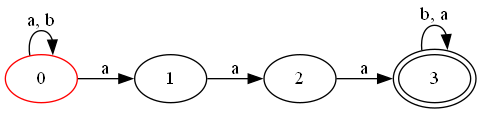

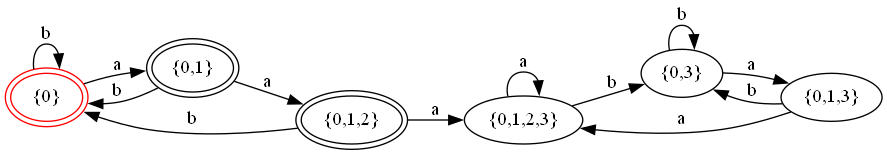

Etats :
  {0}(init)(fin)
  {0,1}(fin)
  {0,1,2}(fin)
  {0,1,2,3}
  {0,3}
  {0,1,3}
Transitions :
  [{0,1,2}(fin)-b->{0}(init)(fin)]
  [{0,1,3}-a->{0,1,2,3}]
  [{0,1,2,3}-b->{0,3}]
  [{0,3}-a->{0,1,3}]
  [{0}(init)(fin)-a->{0,1}(fin)]
  [{0,1}(fin)-a->{0,1,2}(fin)]
  [{0,3}-b->{0,3}]
  [{0,1,2}(fin)-a->{0,1,2,3}]
  [{0}(init)(fin)-b->{0}(init)(fin)]
  [{0,1,2,3}-a->{0,1,2,3}]
  [{0,1}(fin)-b->{0}(init)(fin)]
  [{0,1,3}-b->{0,3}]



In [56]:
# Voici un test

automate = Automate.creationAutomate("ExemplesAutomates/exempleAutomate.txt")
automate.show()
Alphabet = {t.etiquette for t in auto.allTransitions}
auto_compl = automate.complementaire(Alphabet)
auto_compl.show(2)
print(auto_compl)

In [57]:
#Fournir d'autres tests


2. Donner une définition de la fonction `intersection` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant l'intersection des langages acceptés par `auto1` et `auto2`.

L'automate construit ne doit pas avoir d'état non accessible depuis l'état initial.

In [85]:
#A faire

def intersection(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    
    Alphabet = {t.etiquette for t in self.allTransitions}
    
    auto_tmp1=copy.deepcopy(self)#Creation de la copie des automates
    auto_tmp2=copy.deepcopy(auto)
        
    tuple=()
    
    for i in auto_tmp1.getSetInitialStates():
        tuple=tuple+(i,)
    for i in auto_tmp2.getSetInitialStates():
        tuple=tuple+(i,)
        
    auto_res=Automate(set())
    sinit=State(0,True,False,tuple)
    auto_res.addState(sinit) #Creation de l'etat initial

    j=0
    tuple2=()
    tupletmp=()
    ldejavu={tuple}#tuple qui ont deja été vu
    lencours=[sinit]#Etat en cours à traiter
    ltmp=[]#Liste temporaire
    dico=dict()
    dico[sinit]=tuple #dict[State : Tuple[state,state]
    list_tmp=[]

    while len(lencours)!=0: #La boucle continue tant qu'il reste des états à creer
        for h in lencours:
            for i in Alphabet:
                for j in range(0,2):
                    if j%2==0: #(s1,s2) avec s1 un etat appartenant à self et s2 appartenant à auto
                        for t1 in auto_tmp1.succElem(dico[h][j],i):
                            list_tmp.append(t1)
                    else:
                        for li in list_tmp:
                            tuple2=tuple2+(li,)
                            tupletmp=tuple2
                            for t2 in auto_tmp2.succElem(dico[h][j],i):
                                tuple2=tuple2+(t2,)
                                if len(tuple2)==2:
                                    if tuple2 not in ldejavu:  #Si tuple2 n'existe pas encore
                                        if tuple2[0].fin==True and tuple2[1].fin==True: #Si tuple2[0] est un etat final de self et tuple2[1] un etat final de auto, alors l'état à creer un final
                                            se=State(auto_res.nextId(),False,True,tuple2)
                                        else:
                                            se=State(auto_res.nextId(),False,False,tuple2)
                                        ltmp.append(se) #Ajout des etats creer dans ltmp
                                        dico[se]=tuple2
                                        auto_res.addTransition(Transition(h,i,se))
                                    else: #Si tuple2 existe deja
                                        for k, val in dico.items(): #Recherche de la clé appartenant à la valeur tuple2 
                                            if tuple2 == val: 
                                                auto_res.addTransition(Transition(h,i,k))
                                ldejavu.add(tuple2) #Ajout de tuple2 dans les tuple deja vu
                                tuple2=tupletmp
                            tuple2=()
                        tuple2=()
                tuple2=() #Renitialisation de tuple2
                list_tmp=[]
        lencours=ltmp #Liste de nouvelles etats à traiter lors du prochain tours de boucle. Si celle-ci est vide, c'est que touts les etats ont été traiter
        ltmp=[]
        
    
    return auto_res
    
Automate.intersection = intersection

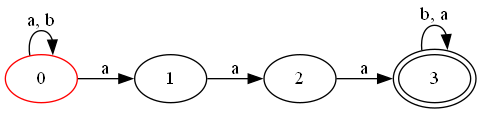

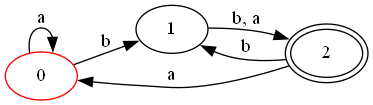

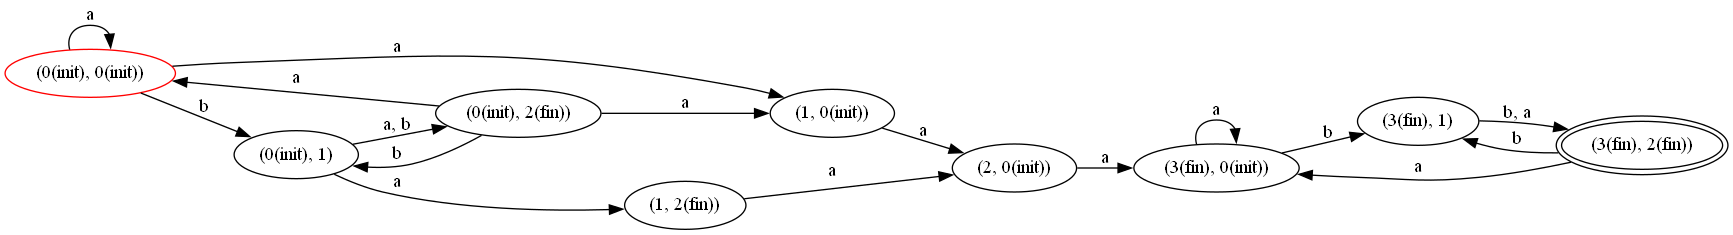

In [86]:
#Un premier test

auto2 = Automate.creationAutomate("ExemplesAutomates/auto2.txt")
automate.show()
auto2.show()

inter = automate.intersection(auto2)
inter.show(2)

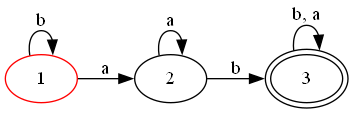

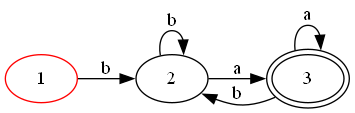

Etats :
  (1(init), 1(init))(init)
  (1(init), 2)
  (2, 3(fin))
  (3(fin), 2)
  (3(fin), 3(fin))(fin)
Transitions :
  [(2, 3(fin))-b->(3(fin), 2)]
  [(2, 3(fin))-a->(2, 3(fin))]
  [(3(fin), 2)-a->(3(fin), 3(fin))(fin)]
  [(1(init), 1(init))(init)-b->(1(init), 2)]
  [(3(fin), 3(fin))(fin)-b->(3(fin), 2)]
  [(1(init), 2)-b->(1(init), 2)]
  [(3(fin), 2)-b->(3(fin), 2)]
  [(3(fin), 3(fin))(fin)-a->(3(fin), 3(fin))(fin)]
  [(1(init), 2)-a->(2, 3(fin))]



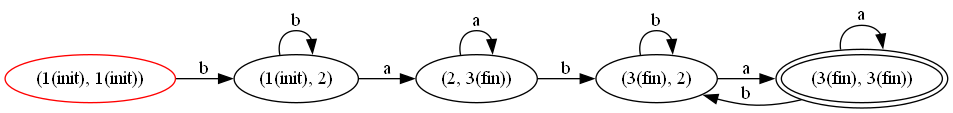

In [87]:
# Fournir d'autres tests

inter1 = Automate.creationAutomate("ExemplesAutomates/auto_inter1.txt")
inter2 = Automate.creationAutomate("ExemplesAutomates/auto_inter2.txt")
inter1.show()
inter2.show()

interfinal = inter1.intersection(inter2)
print(interfinal)
interfinal.show(2)

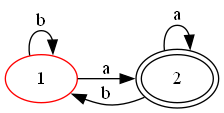

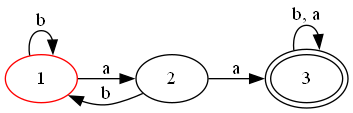

Etats :
  (1(init), 1(init))(init)
  (2(fin), 2)
  (2(fin), 3(fin))(fin)
  (1(init), 3(fin))
Transitions :
  [(2(fin), 3(fin))(fin)-a->(2(fin), 3(fin))(fin)]
  [(1(init), 1(init))(init)-b->(1(init), 1(init))(init)]
  [(2(fin), 3(fin))(fin)-b->(1(init), 3(fin))]
  [(1(init), 3(fin))-a->(2(fin), 3(fin))(fin)]
  [(1(init), 1(init))(init)-a->(2(fin), 2)]
  [(2(fin), 2)-b->(1(init), 1(init))(init)]
  [(1(init), 3(fin))-b->(1(init), 3(fin))]
  [(2(fin), 2)-a->(2(fin), 3(fin))(fin)]



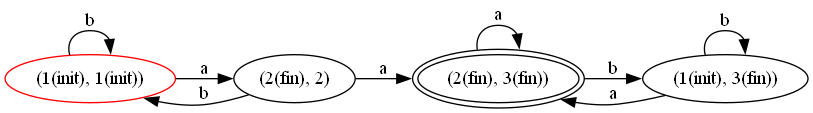

In [88]:
# Fournir d'autres tests

inter3 = Automate.creationAutomate("ExemplesAutomates/auto_inter3.txt")
inter4 = Automate.creationAutomate("ExemplesAutomates/auto_inter4.txt")
inter3.show()
inter4.show()

interfinal1 = inter3.intersection(inter4)
print(interfinal1)
interfinal1.show(2)

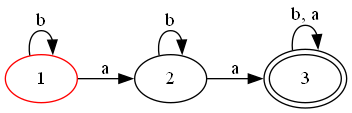

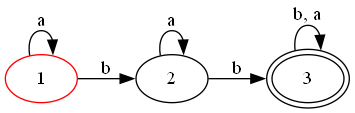

Etats :
  (1(init), 1(init))(init)
  (1(init), 2)
  (2, 1(init))
  (1(init), 3(fin))
  (2, 2)
  (3(fin), 1(init))
  (2, 3(fin))
  (3(fin), 2)
  (3(fin), 3(fin))(fin)
Transitions :
  [(1(init), 3(fin))-a->(2, 3(fin))]
  [(2, 1(init))-b->(2, 2)]
  [(1(init), 2)-a->(2, 2)]
  [(3(fin), 1(init))-b->(3(fin), 2)]
  [(2, 3(fin))-b->(2, 3(fin))]
  [(2, 3(fin))-a->(3(fin), 3(fin))(fin)]
  [(2, 1(init))-a->(3(fin), 1(init))]
  [(2, 2)-a->(3(fin), 2)]
  [(1(init), 1(init))(init)-a->(2, 1(init))]
  [(3(fin), 2)-b->(3(fin), 3(fin))(fin)]
  [(1(init), 1(init))(init)-b->(1(init), 2)]
  [(3(fin), 3(fin))(fin)-b->(3(fin), 3(fin))(fin)]
  [(3(fin), 1(init))-a->(3(fin), 1(init))]
  [(3(fin), 2)-a->(3(fin), 2)]
  [(3(fin), 3(fin))(fin)-a->(3(fin), 3(fin))(fin)]
  [(2, 2)-b->(2, 3(fin))]
  [(1(init), 3(fin))-b->(1(init), 3(fin))]
  [(1(init), 2)-b->(1(init), 3(fin))]



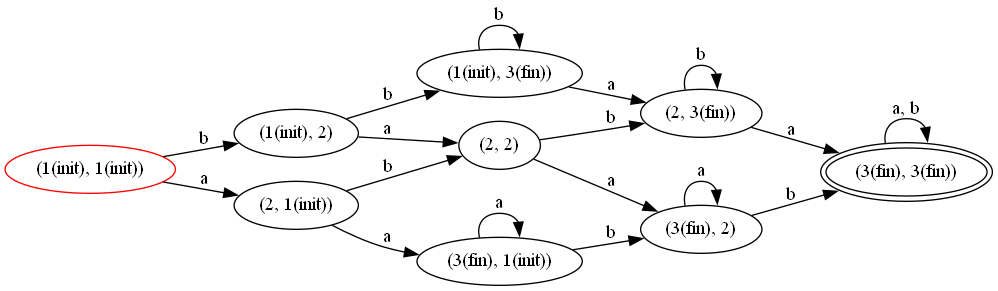

In [89]:
# Fournir d'autres tests

inter5 = Automate.creationAutomate("ExemplesAutomates/auto_inter5.txt")
inter6 = Automate.creationAutomate("ExemplesAutomates/auto_inter6.txt")
inter5.show()
inter6.show()

interfinal2 = inter5.intersection(inter6)
print(interfinal2)
interfinal2.show(2)

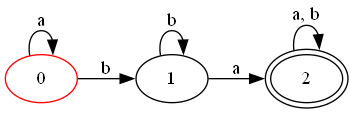

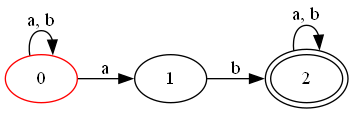

Etats :
  (0(init), 0(init))(init)
  (0(init), 1)
  (1, 0(init))
  (1, 2(fin))
  (2(fin), 0(init))
  (2(fin), 1)
  (2(fin), 2(fin))(fin)
Transitions :
  [(0(init), 0(init))(init)-a->(0(init), 1)]
  [(1, 2(fin))-a->(2(fin), 2(fin))(fin)]
  [(1, 0(init))-b->(1, 0(init))]
  [(1, 2(fin))-b->(1, 2(fin))]
  [(0(init), 1)-b->(1, 2(fin))]
  [(2(fin), 0(init))-a->(2(fin), 0(init))]
  [(2(fin), 1)-b->(2(fin), 2(fin))(fin)]
  [(1, 0(init))-a->(2(fin), 1)]
  [(2(fin), 0(init))-b->(2(fin), 0(init))]
  [(1, 0(init))-a->(2(fin), 0(init))]
  [(2(fin), 2(fin))(fin)-a->(2(fin), 2(fin))(fin)]
  [(2(fin), 2(fin))(fin)-b->(2(fin), 2(fin))(fin)]
  [(0(init), 0(init))(init)-a->(0(init), 0(init))(init)]
  [(2(fin), 0(init))-a->(2(fin), 1)]
  [(0(init), 0(init))(init)-b->(1, 0(init))]



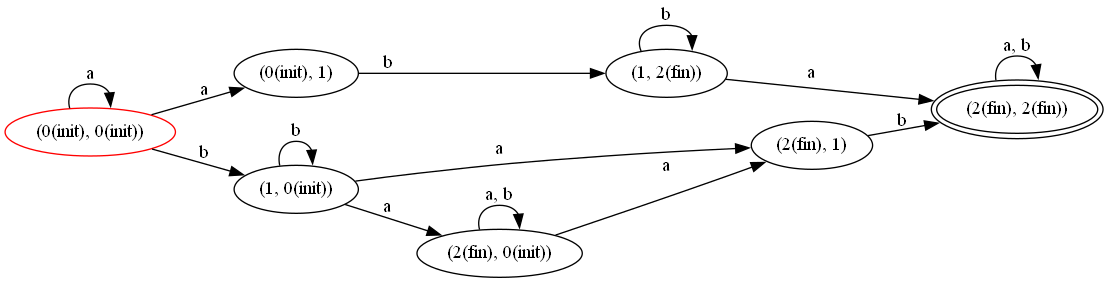

In [90]:
inter7 = Automate.creationAutomate("ExemplesAutomates/auto_inter7.txt")
inter8 = Automate.creationAutomate("ExemplesAutomates/auto_inter8.txt")
inter7.show()
inter8.show()

interfinal3 = inter7.intersection(inter8)
print(interfinal3)
interfinal3.show(2)

3. (Question facultative) Donner une définition de la fonction `union` qui, étant donné deux automates `auto1` `auto2`, renvoie l'automate acceptant comme langage l'union des langages acceptés par `auto1` et `auto2`.

In [83]:
#A faire par l'étudiant

def union(self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage l'intersection des langages des deux automates
    """
    
    Alphabet = {t.etiquette for t in self.allTransitions}
    Alphabet1 = {t.etiquette for t in auto.allTransitions}
    
    auto_tmp1=copy.deepcopy(self)#Creation de la copie des automates
    auto_tmp2=copy.deepcopy(auto)
    
    #On complete l'automate si il ne l'est pas
    if not auto_tmp1.estComplet(Alphabet):
        auto_tmp1=auto_tmp1.completeAutomate(Alphabet)
    if not auto_tmp2.estComplet(Alphabet1):
        auto_tmp2=auto_tmp2.completeAutomate(Alphabet1)
        
    tuple=()
    
    for i in auto_tmp1.getSetInitialStates():
        tuple=tuple+(i,)
    for i in auto_tmp2.getSetInitialStates():
        tuple=tuple+(i,)
        
    auto_res=Automate(set())
    sinit=State(0,True,False,tuple)
    auto_res.addState(sinit) #Creation de l'etat initial

    j=0
    tuple2=()
    tupletmp=()
    ldejavu={tuple}#tuple qui ont deja été vu
    lencours=[sinit]#Etat en cours à traiter
    ltmp=[]#Liste temporaire
    dico=dict()
    dico[sinit]=tuple #dict[State : Tuple[state,state]
    list_tmp=[]

    while len(lencours)!=0: #La boucle continue tant qu'il reste des états à creer
        for h in lencours:
            for i in Alphabet:
                for j in range(0,2):
                    if j%2==0: #(s1,s2) avec s1 un etat appartenant à self et s2 appartenant à auto
                        for t1 in auto_tmp1.succElem(dico[h][j],i):
                            list_tmp.append(t1)
                    else:
                        for li in list_tmp:
                            tuple2=tuple2+(li,)
                            tupletmp=tuple2
                            for t2 in auto_tmp2.succElem(dico[h][j],i):
                                tuple2=tuple2+(t2,)
                                if len(tuple2)==2:
                                    if tuple2 not in ldejavu:  #Si tuple2 n'existe pas encore
                                        if tuple2[0].fin==True or tuple2[1].fin==True: #Si tuple2[0] est un etat final de self ou tuple2[1] un etat final de auto, alors l'état à creer un final
                                            se=State(auto_res.nextId(),False,True,tuple2)
                                        else:
                                            se=State(auto_res.nextId(),False,False,tuple2)
                                        ltmp.append(se) #Ajout des etats creer dans ltmp
                                        dico[se]=tuple2
                                        auto_res.addTransition(Transition(h,i,se))
                                    else: #Si tuple2 existe deja
                                        for k, val in dico.items(): #Recherche de la clé appartenant à la valeur tuple2 
                                            if tuple2 == val: 
                                                auto_res.addTransition(Transition(h,i,k))
                                ldejavu.add(tuple2) #Ajout de tuple2 dans les tuple deja vu
                                tuple2=tupletmp
                            tuple2=()
                        tuple2=()
                tuple2=() #Renitialisation de tuple2
                list_tmp=[]
        lencours=ltmp #Liste de nouvelles etats à traiter lors du prochain tours de boucle. Si celle-ci est vide, c'est que touts les etats ont été traiter
        ltmp=[]
        
    
    return auto_res
    
Automate.union = union

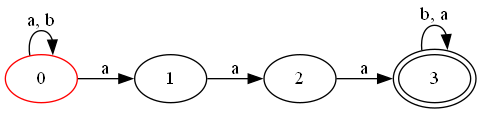

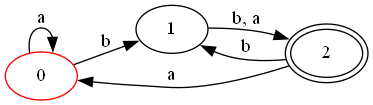

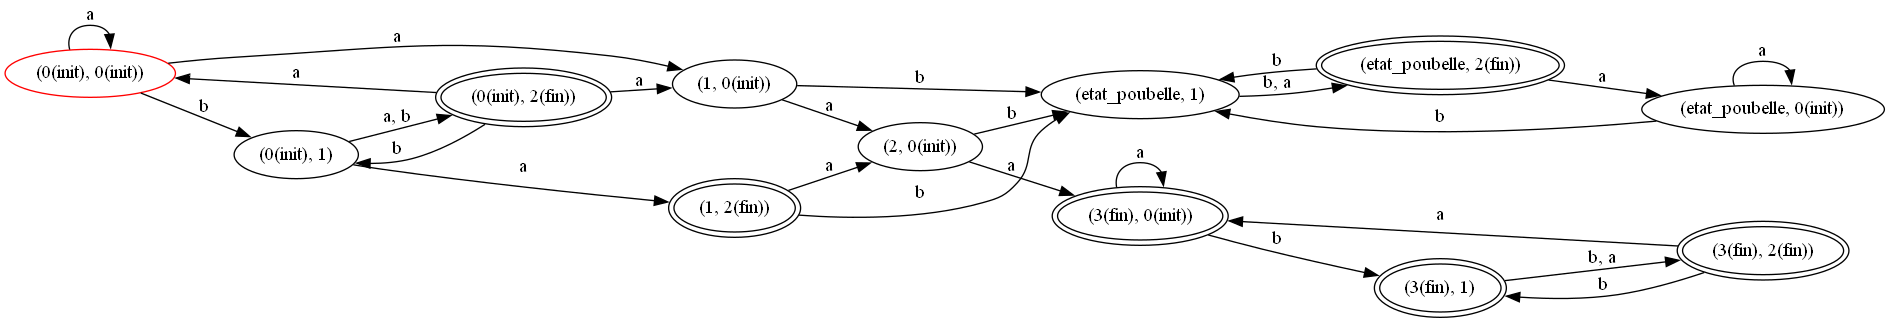

In [84]:
#Un premier test

automate.show()
auto2.show()
uni = automate.union(auto2)
uni.show(2)

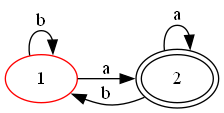

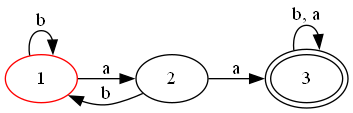

Etats :
  (1(init), 1(init))(init)
  (2(fin), 2)(fin)
  (2(fin), 3(fin))(fin)
  (1(init), 3(fin))(fin)
Transitions :
  [(1(init), 3(fin))(fin)-b->(1(init), 3(fin))(fin)]
  [(2(fin), 3(fin))(fin)-a->(2(fin), 3(fin))(fin)]
  [(1(init), 1(init))(init)-b->(1(init), 1(init))(init)]
  [(1(init), 1(init))(init)-a->(2(fin), 2)(fin)]
  [(2(fin), 2)(fin)-a->(2(fin), 3(fin))(fin)]
  [(2(fin), 3(fin))(fin)-b->(1(init), 3(fin))(fin)]
  [(2(fin), 2)(fin)-b->(1(init), 1(init))(init)]
  [(1(init), 3(fin))(fin)-a->(2(fin), 3(fin))(fin)]



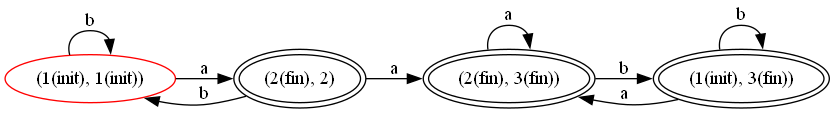

In [68]:
# Fournir d'autres tests
union1 = Automate.creationAutomate("ExemplesAutomates/auto_inter3.txt")
union2 = Automate.creationAutomate("ExemplesAutomates/auto_inter4.txt")
union1.show()
union2.show()

unionfinal = union1.union(union2)
print(unionfinal)
unionfinal.show(2)


#### 5.2 Opérations rationnelles sur les langages <a class="anchor" id="sec5_2"></a>

Programmer *une des deux* méthodes suivantes:

1. Donner une définition de la fonction `concatenation` qui, étant donné deux automates `auto1` et `auto2`, renvoie l'automate acceptant comme langage la concaténation des langages acceptés par `auto1` et `auto2`.

2. Donner une définition de la fonction `etoile` qui, étant donné un automate `auto`, renvoie l'automate acceptant comme langage l'étoile du langages accepté par `auto`.

In [69]:
# A faire

def concatenation (self, auto):
    """ Automate x Automate -> Automate
    rend l'automate acceptant pour langage la concaténation des langages des deux automates
    """
    
    Alphabet = {t.etiquette for t in self.allTransitions}
    self_tmp=copy.deepcopy(self)
    auto_tmp=copy.deepcopy(auto)
    auto_tmp.prefixStates(1)
    t=(self_tmp.allTransitions).union(auto_tmp.allTransitions)
    auto_res=Automate(t)
    for i in Alphabet:
        for j in self_tmp.allStates:
            s=self_tmp.succElem(j,i)
            for z in s:
                if z in self_tmp.getSetFinalStates():
                    for k in auto_tmp.getSetInitialStates():
                        auto_res.addTransition(Transition(j,i,k))
    if (len(self_tmp.getSetInitialStates().intersection(self_tmp.getSetFinalStates()))==0):
        for i in (auto_tmp.allStates):
            i.init=False
    for j in (self_tmp.allStates):
        j.fin=False
            
    return auto_res

Automate.concatenation = concatenation


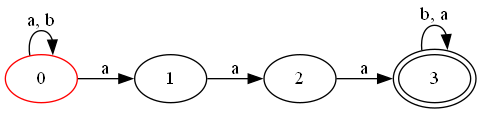

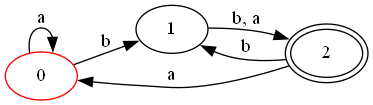

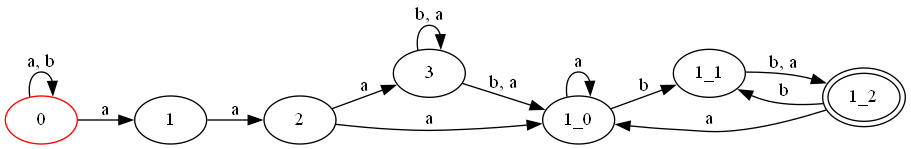

Etats :
  0(init)
  1
  2
  3
  1_0
  1_1
  1_2(fin)
Transitions :
  [3-b->3]
  [0(init)-b->0(init)]
  [2-a->1_0]
  [3-a->3]
  [1_1-b->1_2(fin)]
  [0(init)-a->1]
  [3-a->1_0]
  [1_2(fin)-b->1_1]
  [1_0-b->1_1]
  [1-a->2]
  [0(init)-a->0(init)]
  [1_0-a->1_0]
  [1_1-a->1_2(fin)]
  [3-b->1_0]
  [1_2(fin)-a->1_0]
  [2-a->3]



In [70]:
#Un premier test

automate.show()
auto2.show()
concat = automate.concatenation(auto2)
concat.show(2)
print(concat)


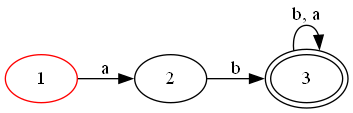

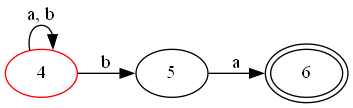

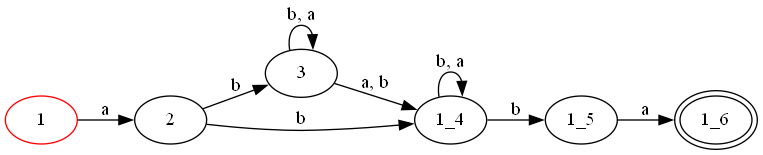

In [71]:
#Fournir un autre jeu de test
a1 = Automate.creationAutomate("ExemplesAutomates/a1.txt")
a2 = Automate.creationAutomate("ExemplesAutomates/a2.txt")
a1.show()
a2.show()
concat = a1.concatenation(a2)
concat.show()

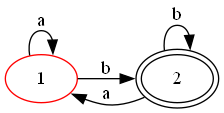

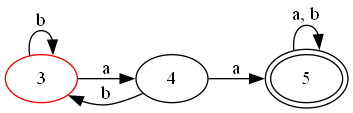

Etats :
  1(init)
  2
  1_3
  1_4
  1_5(fin)
Transitions :
  [1_3-b->1_3]
  [1_5(fin)-b->1_5(fin)]
  [2-b->1_3]
  [2-a->1(init)]
  [1(init)-b->1_3]
  [1(init)-a->1(init)]
  [1_4-a->1_5(fin)]
  [1_3-a->1_4]
  [2-b->2]
  [1_4-b->1_3]
  [1(init)-b->2]
  [1_5(fin)-a->1_5(fin)]



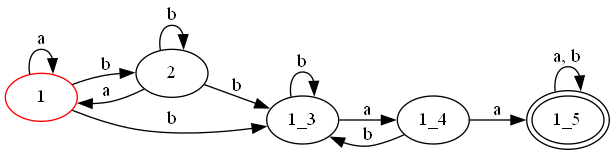

In [72]:
#Fournir un autre jeu de test
a3 = Automate.creationAutomate("ExemplesAutomates/a3.txt")
a3.show()
a4 = Automate.creationAutomate("ExemplesAutomates/a4.txt")
a4.show()
concat = a3.concatenation(a4)
print(concat)
concat.show()

Automate5 reconnaissant L5


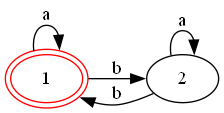

Automate6 reconnaissant L6


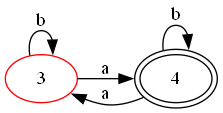

Automate reconnaissant L5.L6


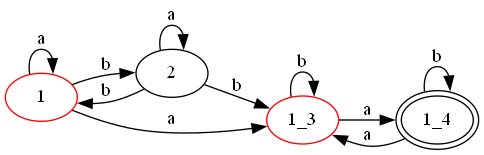

Automate reconnaissant L6.L5


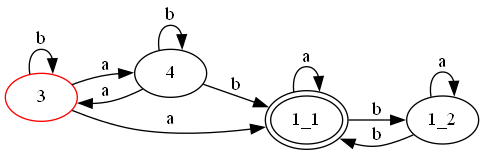

In [80]:
#Fournir un autre jeu de test
a5 = Automate.creationAutomate("ExemplesAutomates/a5.txt")
a6 = Automate.creationAutomate("ExemplesAutomates/a6.txt")
print("Automate5 reconnaissant L5")
a5.show()
print("Automate6 reconnaissant L6")
a6.show()
concat = a5.concatenation(a6)
concat1 = a6.concatenation(a5)
print("Automate reconnaissant L5.L6")
concat.show()
print("Automate reconnaissant L6.L5")
concat1.show()

In [74]:
def etoile (self):
    """ Automate  -> Automate
    rend l'automate acceptant pour langage l'étoile du langage de a
    """
    #Faire L+
    #Etats initiaux devienne finaux
    auto_res=copy.deepcopy(self)
    Alphabet = {t.etiquette for t in auto_res.allTransitions}
    for i in Alphabet:
        for j in auto_res.allStates:
            s=auto_res.succElem(j,i)
            for z in s:
                if z in auto_res.getSetFinalStates():
                    for k in auto_res.getSetInitialStates():
                        auto_res.addTransition(Transition(j,i,k))
                      
    for i in auto_res.getSetInitialStates():
        i.fin=True
        #Etat initial devient aussi final car il accepte le mots vide
    return auto_res

Automate.etoile = etoile

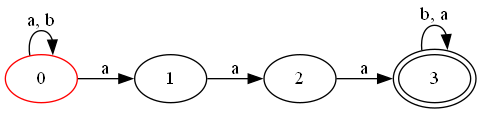

Etats :
  0(init)(fin)
  1
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [2-a->0(init)(fin)]
  [0(init)(fin)-b->0(init)(fin)]
  [3(fin)-a->3(fin)]
  [0(init)(fin)-a->1]
  [1-a->2]
  [0(init)(fin)-a->0(init)(fin)]
  [3(fin)-a->0(init)(fin)]
  [3(fin)-b->0(init)(fin)]
  [2-a->3(fin)]



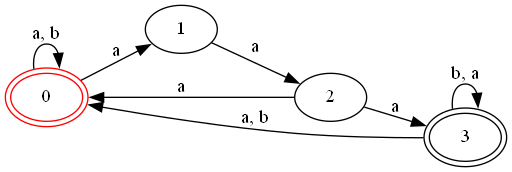

In [75]:
#Un premier test

automate.show()
autoetoile = automate.etoile()
print(autoetoile)
autoetoile.show()

Etats :
  1(init)(fin)
  2
  3(fin)
Transitions :
  [3(fin)-b->3(fin)]
  [3(fin)-b->1(init)(fin)]
  [1(init)(fin)-a->2]
  [2-a->1(init)(fin)]
  [1(init)(fin)-b->1(init)(fin)]
  [2-b->2]
  [2-a->3(fin)]



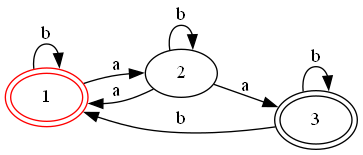

In [76]:
#Fournir un autre jeu de tests
a7=Automate.creationAutomate("ExemplesAutomates/a7.txt")
autoetoile = a7.etoile()
print(autoetoile)
autoetoile.show()